<a href="https://colab.research.google.com/github/RoboMaroof/ComputerVision/blob/master/MNIST_Digits_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Imports

In [24]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import np_utils
from sklearn.metrics import confusion_matrix
import seaborn as sns

np.random.seed(0)

#Data

In [4]:
  from keras.datasets import mnist
  (x_train, y_train), (x_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [5]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


# Visualize examples

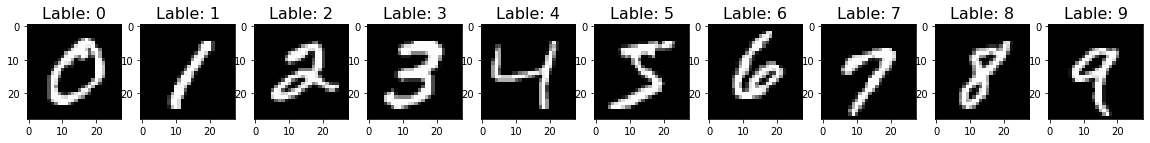

In [22]:
num_classes = 10
f,ax = plt.subplots(1, num_classes, figsize = (20,20))
for i in range(0, num_classes):
  sample = x_train[y_train == i][0]
  ax[i].imshow(sample, cmap='gray')
  ax[i].set_title("Lable: {}".format(i), fontsize=16)

In [25]:
y_train = keras.utils.np_utils.to_categorical(y_train, num_classes)
y_test = keras.utils.np_utils.to_categorical(y_test, num_classes)

In [26]:
for i in range (10):
  print(y_train[i])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


#Prepare Data

In [27]:
# Normalize Data
x_train = x_train / 255.0
x_test = x_test / 255.0

In [28]:
#Reshape Data
x_train = x_train.reshape(x_train.shape[0],-1)
x_test = x_test.reshape(x_test.shape[0],-1)

#Create Model - Fully Connected Neural Network

In [31]:
model = Sequential()

model.add(Dense(units=128, input_shape=(784,), activation='relu'))
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(units=10, input_shape=(784,), activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()
 

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 128)               100480    
                                                                 
 dense_4 (Dense)             (None, 128)               16512     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_5 (Dense)             (None, 10)                1290      
                                                                 
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


#Train

In [32]:
batch_size = 512
epochs = 10
model.fit(x=x_train, y=y_train, batch_size=batch_size, epochs=epochs)

Epoch 1/10
118/118 [==============================] - 2s 9ms/step - loss: 0.5858 - accuracy: 0.8299
Epoch 2/10
118/118 [==============================] - 1s 9ms/step - loss: 0.2194 - accuracy: 0.9355
Epoch 3/10
118/118 [==============================] - 1s 11ms/step - loss: 0.1602 - accuracy: 0.9530
Epoch 4/10
118/118 [==============================] - 1s 9ms/step - loss: 0.1280 - accuracy: 0.9618
Epoch 5/10
118/118 [==============================] - 1s 9ms/step - loss: 0.1053 - accuracy: 0.9688
Epoch 6/10
118/118 [==============================] - 1s 10ms/step - loss: 0.0892 - accuracy: 0.9733
Epoch 7/10
118/118 [==============================] - 1s 10ms/step - loss: 0.0776 - accuracy: 0.9764
Epoch 8/10
118/118 [==============================] - 1s 10ms/step - loss: 0.0661 - accuracy: 0.9803
Epoch 9/10
118/118 [==============================] - 1s 9ms/step - loss: 0.0590 - accuracy: 0.9817
Epoch 10/10
118/118 [==============================] - 1s 10ms/step - loss: 0.0497 - accuracy: 0

#Evaluate

In [33]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test Loss: {}, Test Accuracy: {}".format(test_loss,test_acc))

313/313 [==============================] - 1s 4ms/step - loss: 0.0715 - accuracy: 0.9777
Test Loss: 0.07147528976202011, Test Accuracy: 0.9776999950408936


In [34]:
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
print(y_pred_classes)

[7 2 1 ... 4 5 6]


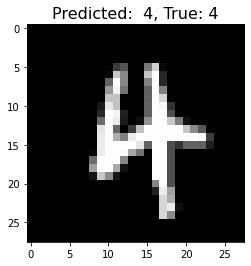

In [41]:
#Single Example
random_idx = np.random.choice(len(x_test))
x_sample = x_test[random_idx]
y_true = np.argmax(y_test, axis=1)
y_sample_true = y_true[random_idx]
y_sample_pred_class = y_pred_classes[random_idx]

plt.title("Predicted:  {}, True: {}".format(y_sample_pred_class, y_sample_true), fontsize=16)
plt.imshow(x_sample.reshape(28,28), cmap='gray')